# Explanatory analysis

##  Graphics Device

### What is a Graphics Device?

* A graphics device is something where you can make a plot appear

  * A window on your computer (screen device)
  
  * A PDF file (file device)

  * A PNG or JPEG file (file device)

  * A scalable vector graphics (SVG) file (file device)

* When you make a plot in R, it has to be "sent" to a specific
  graphics device

* The most common place for a plot to be "sent" is the *screen device*

  * On a Mac the screen device is launched with the `quartz()`

  * On Windows the screen device is launched with `windows()`

  * On Unix/Linux the screen device is launched with `x11()`

### What is a Graphic Device?

* When making a plot, you need to consider how the plot will be used
  to determine what device the plot should be sent to.

  - The list of devices is found in `?Devices`; there are also devices
    created by users on CRAN


* For quick visualizations and exploratory analysis, usually you want
  to use the screen device

  - Functions like `plot` in base, `xyplot` in lattice, or `qplot` in
    ggplot2 will default to sending a plot to the screen device
  
  - On a given platform (Mac, Windows, Unix/Linux) there is only one
    screen device

* For plots that may be printed out or be incorporated into a document
  (e.g. papers/reports, slide presentations), usually a *file device*
  is more appropriate

  - There are many different file devices to choose from

* NOTE: Not all graphics devices are available on all platforms
  (i.e. you cannot launch the `windows()` on a Mac)

### How Does a Plot Get Created?

There are two basic approaches to plotting. The first is most common:

1. Call a plotting function like `plot`, `xyplot`, or `qplot`

2. The plot appears on the screen device

3. Annotate plot if necessary

4. Enjoy

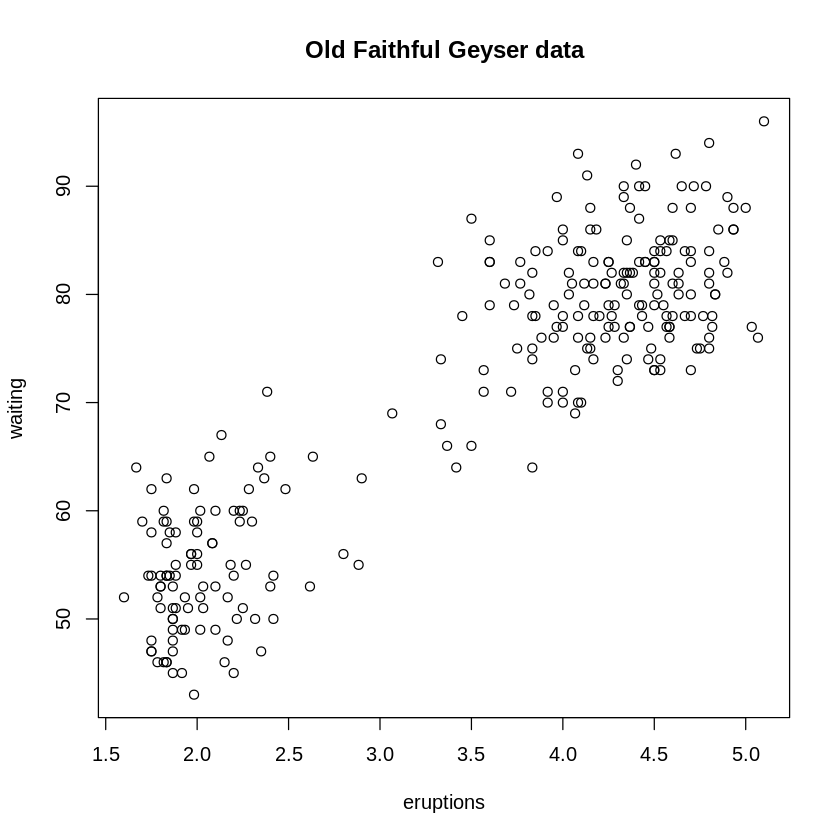

In [1]:
library(datasets)
with(faithful, plot(eruptions, waiting))  ## Make plot appear on screen device
title(main = "Old Faithful Geyser data")  ## Annotate with a title


### How Does a Plot Get Created?

The second approach to plotting is most commonly used for file devices:

1. Explicitly launch a graphics device

2. Call a plotting function to make a plot (Note: if you are using a file
device, no plot will appear on the screen)

3. Annotate plot if necessary

3. Explicitly close graphics device with `dev.off()` (this is very important!)

```{r,eval=FALSE}
pdf(file = "myplot.pdf")  ## Open PDF device; create 'myplot.pdf' in my working directory
## Create plot and send to a file (no plot appears on screen)
with(faithful, plot(eruptions, waiting))  
title(main = "Old Faithful Geyser data")  ## Annotate plot; still nothing on screen
dev.off()  ## Close the PDF file device
## Now you can view the file 'myplot.pdf' on your computer
```

### Graphics File Devices

There are two basic types of file devices: *vector* and *bitmap*
devices

Vector formats:

- `pdf`: useful for line-type graphics, resizes well, usually
  portable, not efficient if a plot has many objects/points

- `svg`: XML-based scalable vector graphics; supports animation and
  interactivity, potentially useful for web-based plots

- `win.metafile`: Windows metafile format (only on Windows)

- `postscript`: older format, also resizes well, usually portable, can
  be used to create encapsulated postscript files; Windows systems
  often don’t have a postscript viewer

### Graphics File Devices

Bitmap formats

- `png`: bitmapped format, good for line drawings or images with solid
  colors, uses lossless compression (like the old GIF format), most
  web browsers can read this format natively, good for plotting many
  many many points, does not resize well

- `jpeg`: good for photographs or natural scenes, uses lossy
  compression, good for plotting many many many points, does not
  resize well, can be read by almost any computer and any web browser,
  not great for line drawings

- `tiff`: Creates bitmap files in the TIFF format; supports lossless
  compression

- `bmp`: a native Windows bitmapped format


### Summary

* Plots must be created on a graphics device

* The default graphics device is almost always the screen device,
  which is most useful for exploratory analysis

* File devices are useful for creating plots that can be included in
  other documents or sent to other people

* For file devices, there are vector and bitmap formats

  - Vector formats are good for line drawings and plots with solid
    colors using a modest number of points

  - Bitmap formats are good for plots with a large number of points,
    natural scenes or web-based plots

## Plotting systems

### The Base Plotting System

* "Artist's palette" model
* Start with blank canvas and build up from there
* Start with plot function (or similar)

* Use annotation functions to add/modify (`text`, `lines`, `points`,
  `axis`)

### The Base Plotting System

* Convenient, mirrors how we think of building plots and analyzing data

* Can’t go back once plot has started (i.e. to adjust margins); need
  to plan in advance

* Difficult to "translate" to others once a new plot has been created
  (no graphical "language")

* Plot is just a series of R commands

### Base Plot

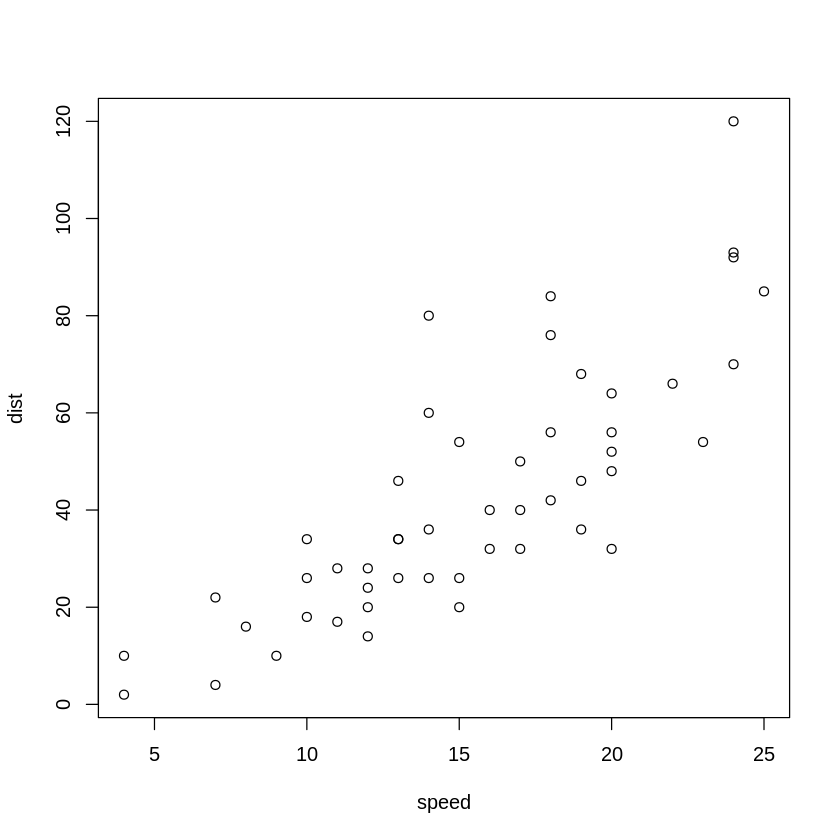

In [4]:
library(datasets)
data(cars)
with(cars, plot(speed, dist))

### The Lattice System

* Plots are created with a single function call (`xyplot`, `bwplot`,
etc.)

* Most useful for conditioning types of plots: Looking at how y changes with x across levels of z

* Things like margins/spacing set automatically because entire plot is
  specified at once

*  Good for puttng many many plots on a screen

### The Lattice System

* Sometimes awkward to specify an entire plot in a single function call

* Annotation in plot is not especially intuitive

* Use of panel functions and subscripts difficult to wield and
  requires intense preparation

* Cannot "add" to the plot once it is created


### Lattice Plot

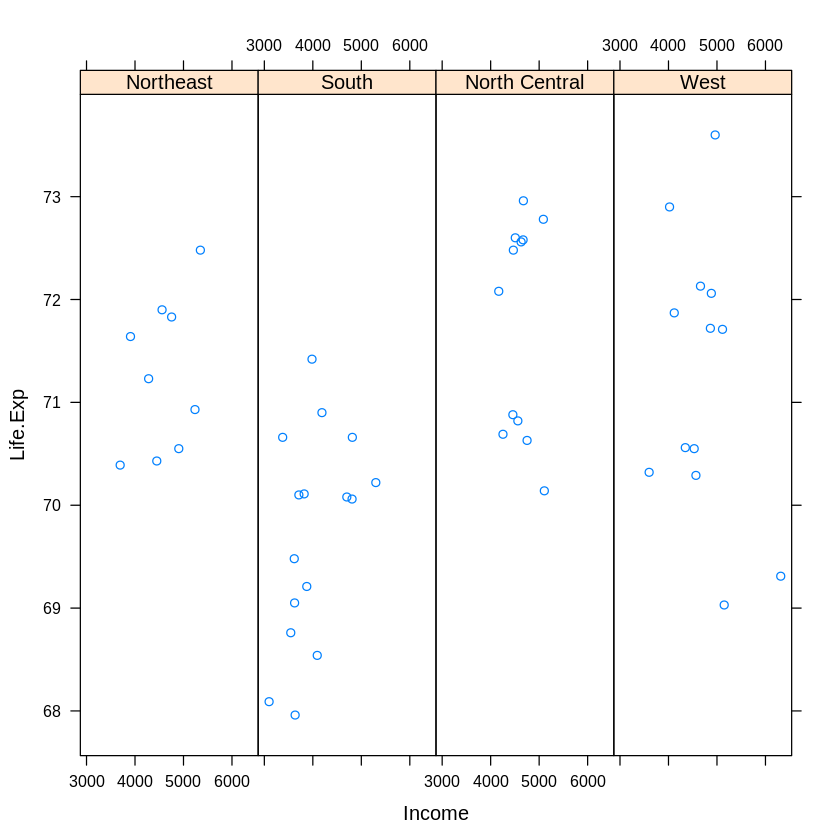

In [5]:
library(lattice)
state <- data.frame(state.x77, region = state.region)
xyplot(Life.Exp ~ Income | region, data = state, layout = c(4, 1))


### The ggplot2 System

* Splits the difference between base and lattice in a number of ways

* Automatically deals with spacings, text, titles but also allows you
  to annotate by "adding" to a plot

* Superficial similarity to lattice but generally easier/more
  intuitive to use

* Default mode makes many choices for you (but you can still customize
  to your heart's desire)

### ggplot2 Plot

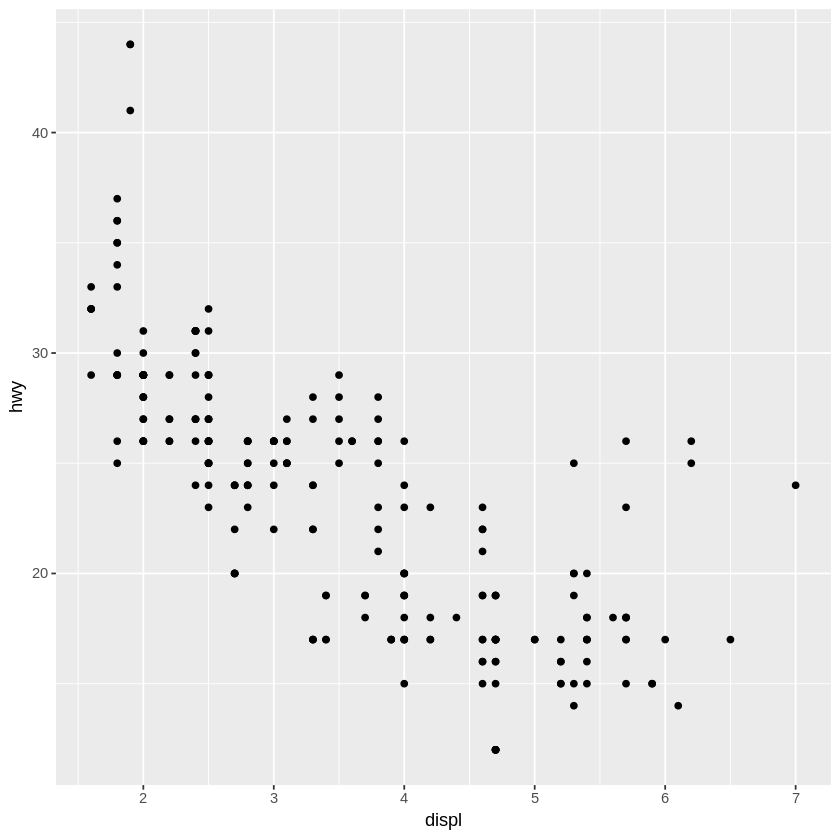

In [6]:
library(ggplot2)
data(mpg)
qplot(displ, hwy, data = mpg)


### Summary

* Base: "artist's palette" model

* Lattice: Entire plot specified by one function; conditioning

* ggplot2: Mixes elements of Base and Lattice


### References

Paul Murrell (2011). *R Graphics*, CRC Press.

Hadley Wickham (2009). *ggplot2*, Springer.

## Plotting Base

### Plotting System

The core plotting and graphics engine in R is encapsulated in the
following packages:

- *graphics*: contains plotting functions for the "base" graphing
   systems, including `plot`, `hist`, `boxplot` and many others.

- *grDevices*: contains all the code implementing the various graphics
   devices, including X11, PDF, PostScript, PNG, etc.

The lattice plotting system is implemented using the following packages:

- *lattice*: contains code for producing Trellis graphics, which are
   independent of the “base” graphics system; includes functions like
   `xyplot`, `bwplot`, `levelplot`

- *grid*: implements a different graphing system independent of the
   “base” system; the *lattice* package builds on top of *grid*; we
   seldom call functions from the *grid* package directly

### The Process of Making a Plot

When making a plot one must first make a few considerations (not
necessarily in this order):

- Where will the plot be made? On the screen? In a file? 

<!--
  - The default in Unix is `x11`; on Windows it is `windows`; on Mac
    OS X it is `quartz`
-->

- How will the plot be used?
  - Is the plot for viewing temporarily on the screen?  
  - Will it be presented in a web browser?
  - Will it eventually end up in a paper that might be printed? 
  - Are you using it in a presentation?

- Is there a large amount of data going into the plot? Or is it just a
  few points?

- Do you need to be able to dynamically resize the graphic?

### The Process of Making a Plot

- What graphics system will you use: base, lattice, or ggplot2? These
  generally cannot be mixed.

- Base graphics are usually constructed piecemeal, with each aspect of
  the plot handled separately through a series of function calls; this
  is often conceptually simpler and allows plotting to mirror the
  thought process

- Lattice graphics are usually created in a single function call, so
  all of the graphics parameters have to specified at once; specifying
  everything at once allows R to automatically calculate the necessary
  spacings and font sizes.

- ggplot2 combines concepts from both base and lattice graphics but
  uses an independent implementation

We focus on using the **base plotting system** to create graphics on
the **screen device**.

### Base Graphics

Base graphics are used most commonly and are a very powerful system for creating 2-D graphics.

- There are two *phases* to creating a base plot
  - Initializing a new plot
  - Annotating (adding to) an existing plot

- Calling `plot(x, y)` or `hist(x)` will launch a graphics device (if
  one is not already open) and draw a new plot on the device

- If the arguments to `plot` are not of some special class, then the
  _default_ method for `plot` is called; this function has _many_
  arguments, letting you set the title, x axis label, y axis label,
  etc.

- The base graphics system has _many_ parameters that can set and
  tweaked; these parameters are documented in `?par`; it wouldn’t hurt
  to try to memorize this help page!

### Simple Base Graphics: Histogram

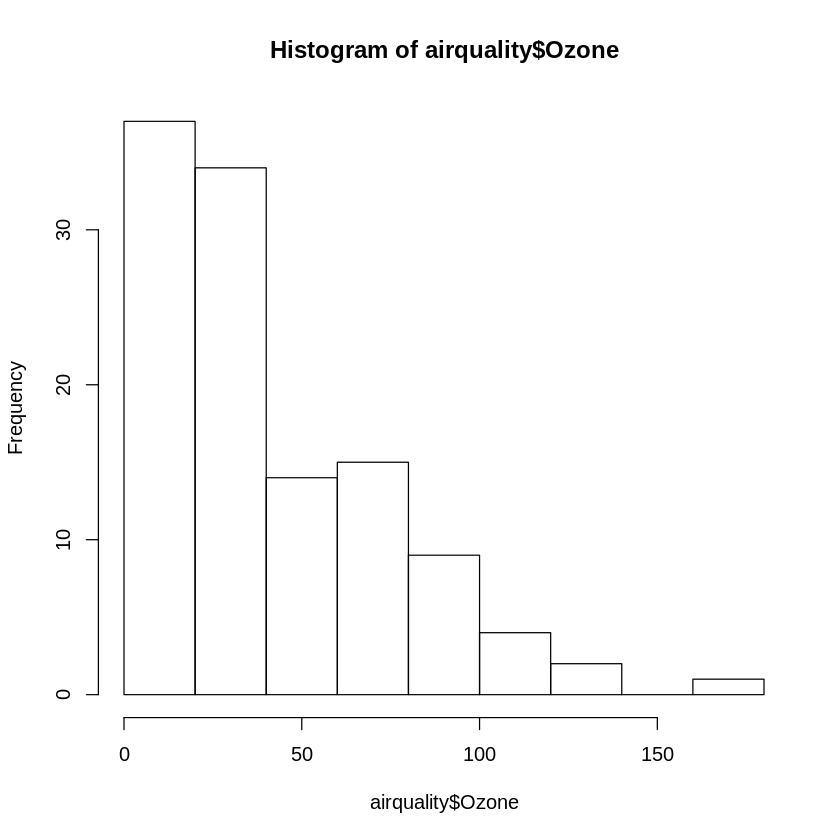

In [7]:
library(datasets)
hist(airquality$Ozone)  ## Draw a new plot


### Simple Base Graphics: Scatterplot

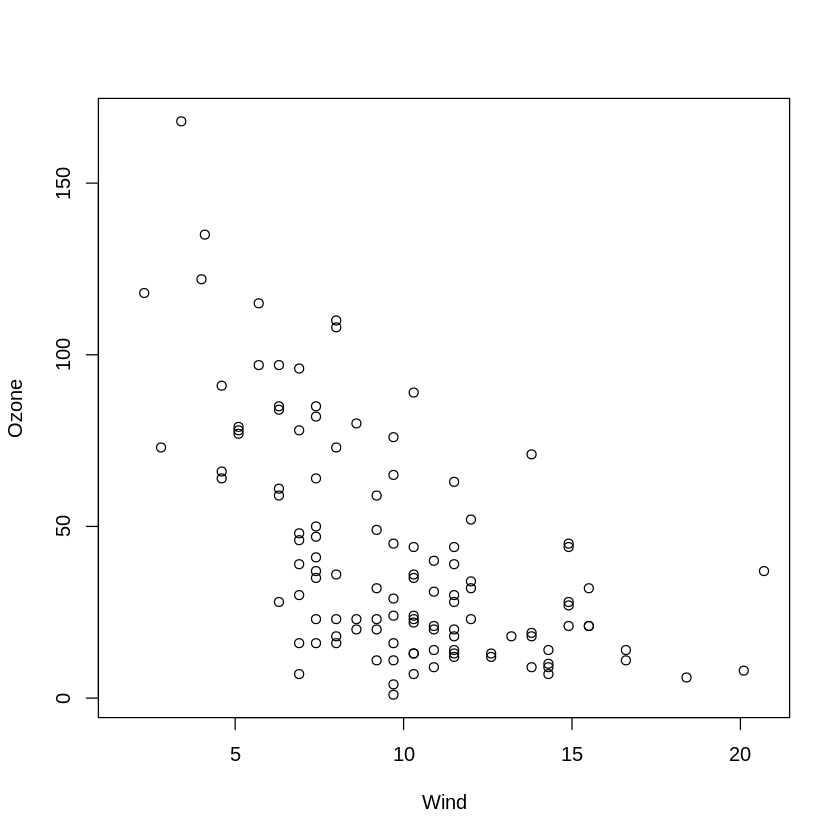

In [8]:
library(datasets)
with(airquality, plot(Wind, Ozone))

### Simple Base Graphics: Boxplot

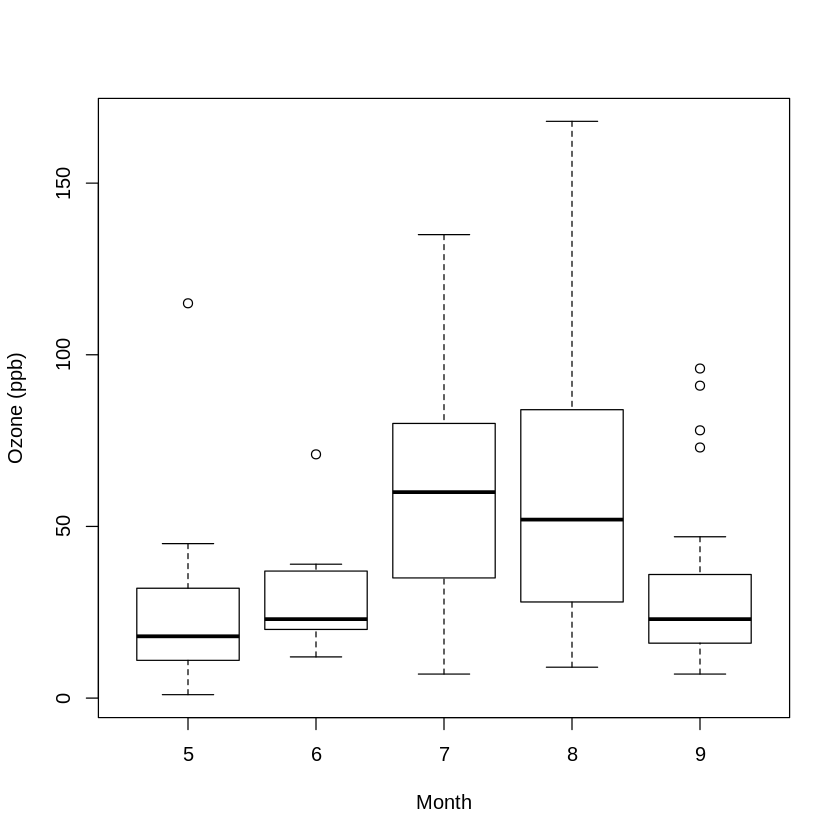

In [9]:
library(datasets)
airquality <- transform(airquality, Month = factor(Month))
boxplot(Ozone ~ Month, airquality, xlab = "Month", ylab = "Ozone (ppb)")

### Some Important Base Graphics Parameters

Many base plotting functions share a set of parameters. Here are a few
key ones:

- `pch`: the plotting symbol (default is open circle)

- `lty`: the line type (default is solid line), can be dashed, dotted, etc.

- `lwd`: the line width, specified as an integer multiple

- `col`: the plotting color, specified as a number, string, or hex
  code; the `colors()` function gives you a vector of colors by name

- `xlab`: character string for the x-axis label

- `ylab`: character string for the y-axis label

### Some Important Base Graphics Parameters

The `par()` function is used to specify *global* graphics parameters
that affect all plots in an R session. These parameters can be
overridden when specified as arguments to specific plotting functions.

- `las`: the orientation of the axis labels on the plot
- `bg`: the background color
- `mar`: the margin size
- `oma`: the outer margin size (default is 0 for all sides)
- `mfrow`: number of plots per row, column (plots are filled row-wise) 
- `mfcol`: number of plots per row, column (plots are filled column-wise)

### Some Important Base Graphics Parameters

Default values for global graphics parameters

In [1]:
par("lty")
par("col")
par("pch")


[1] "solid"

[1] "black"

[1] 1

### Some Important Base Graphics Parameters

Default values for global graphics parameters

In [2]:
par("bg")
par("mar")
par("mfrow")


[1] "white"

[1] 5.1 4.1 4.1 2.1

[1] 1 1

### Base Plotting Functions

- `plot`: make a scatterplot, or other type of plot depending on the
  class of the object being plotted

- `lines`: add lines to a plot, given a vector x values and a
  corresponding vector of y values (or a 2-column matrix); this
  function just connects the dots

- `points`: add points to a plot
- `text`: add text labels to a plot using specified x, y coordinates
- `title`: add annotations to x, y axis labels, title, subtitle, outer margin 
- `mtext`: add arbitrary text to the margins (inner or outer) of the plot 
- `axis`: adding axis ticks/labels


### Base Plot with Annotation


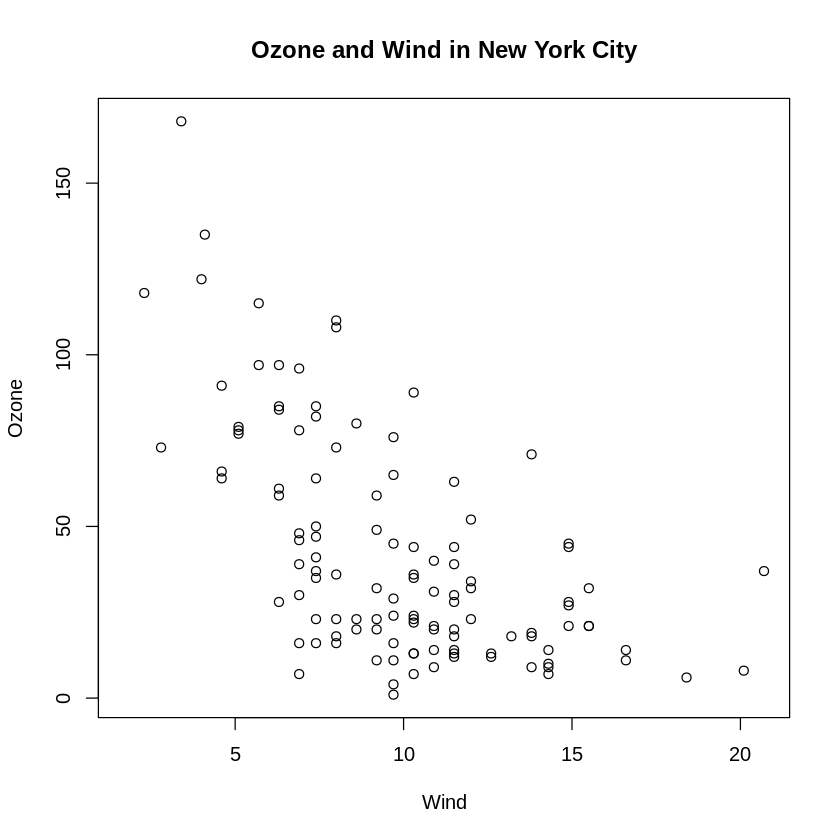

In [11]:
library(datasets)
with(airquality, plot(Wind, Ozone))
title(main = "Ozone and Wind in New York City")  ## Add a title


### Base Plot with Annotation

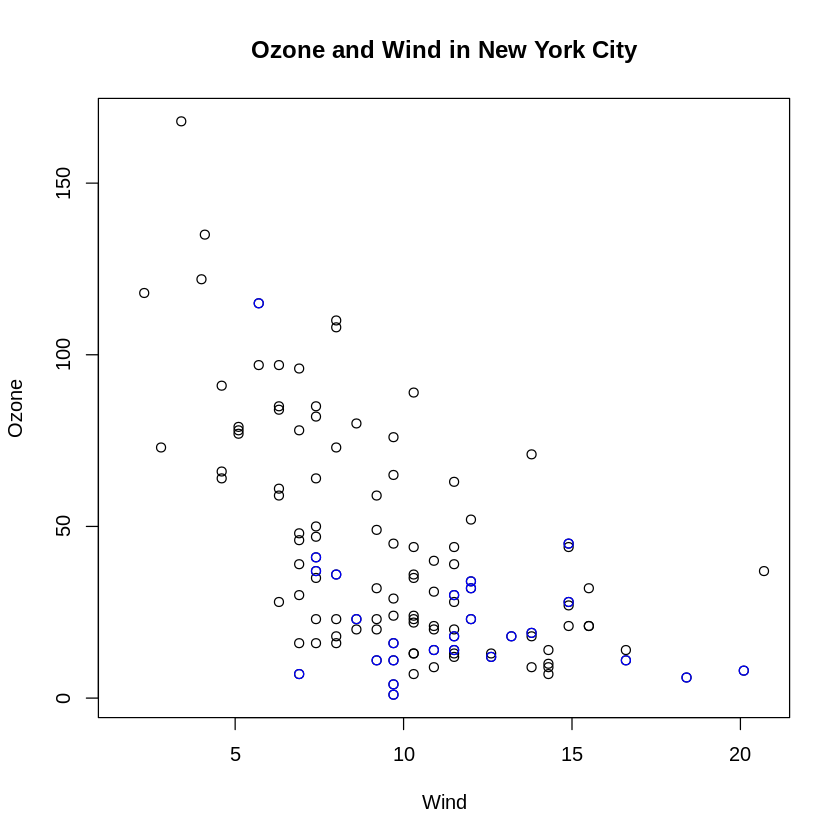

In [12]:
with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New York City"))
with(subset(airquality, Month == 5), points(Wind, Ozone, col = "blue"))


### Base Plot with Annotation

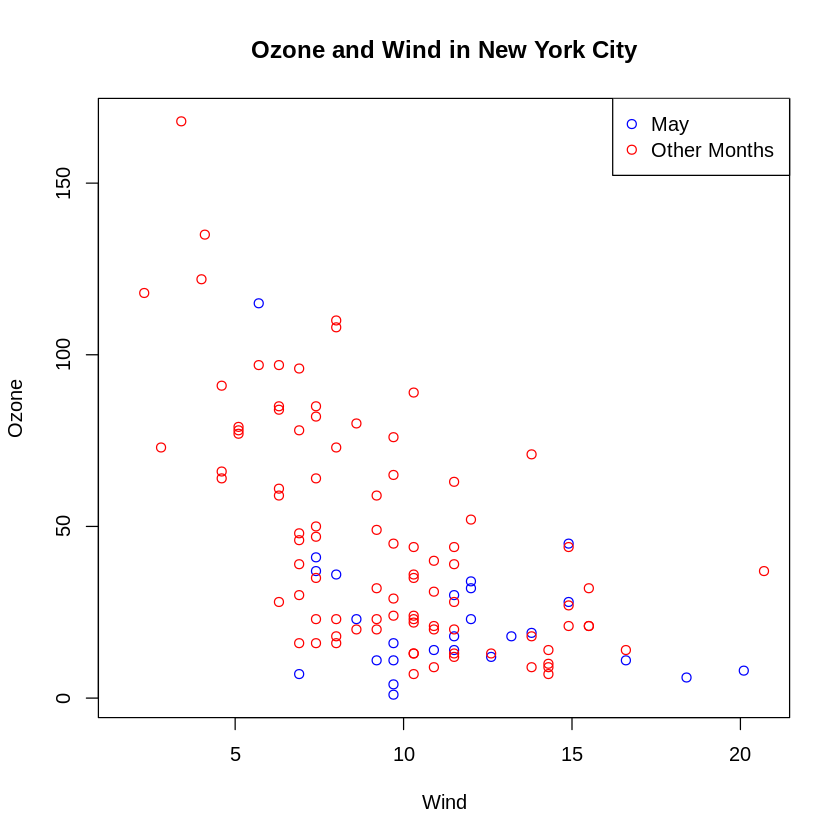

In [13]:
with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New York City", type = "n"))
with(subset(airquality, Month == 5), points(Wind, Ozone, col = "blue"))
with(subset(airquality, Month != 5), points(Wind, Ozone, col = "red"))
legend("topright", pch = 1, col = c("blue", "red"), legend = c("May", "Other Months"))


### Base Plot with Regression Line

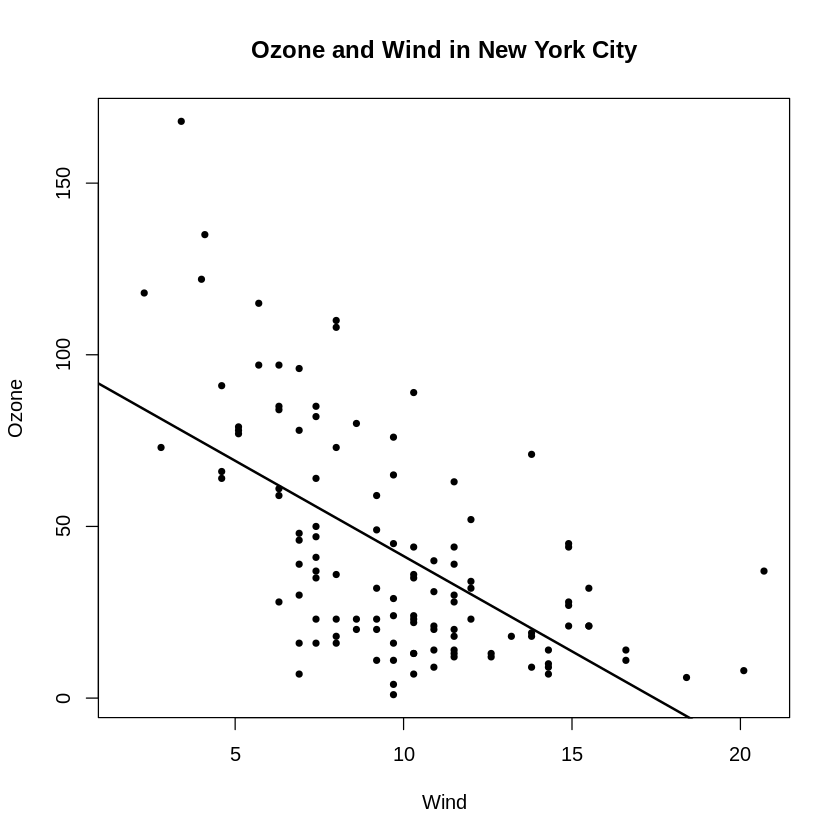

In [14]:
with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New York City", pch = 20))
model <- lm(Ozone ~ Wind, airquality)
abline(model, lwd = 2)

### Multiple Base Plots

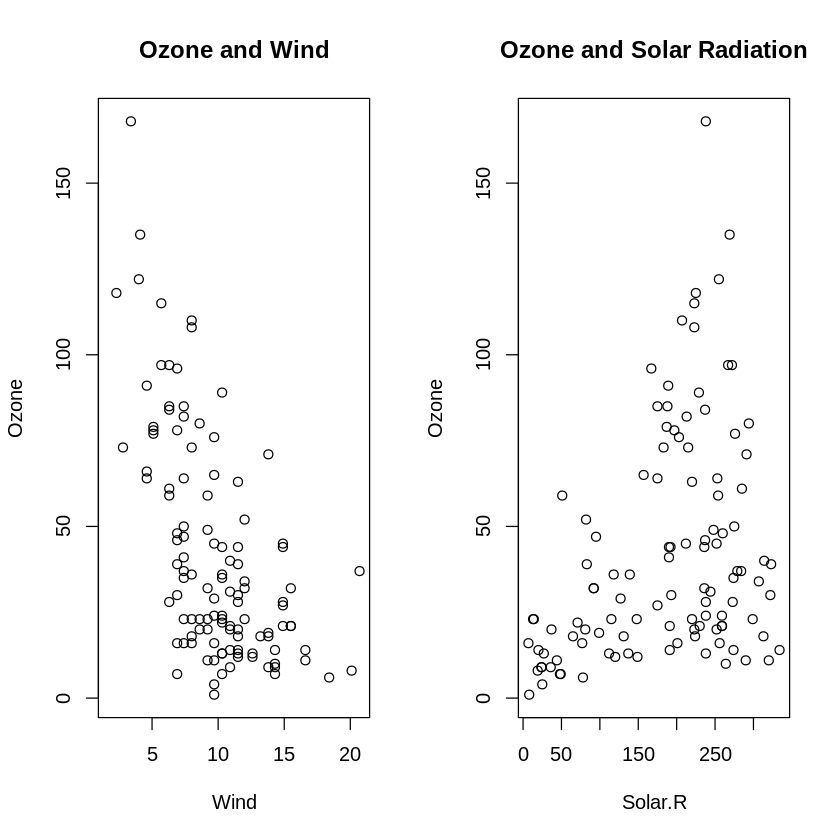

In [15]:
par(mfrow = c(1, 2))
with(airquality, {
	plot(Wind, Ozone, main = "Ozone and Wind")
	plot(Solar.R, Ozone, main = "Ozone and Solar Radiation")
})

### Multiple Base Plots

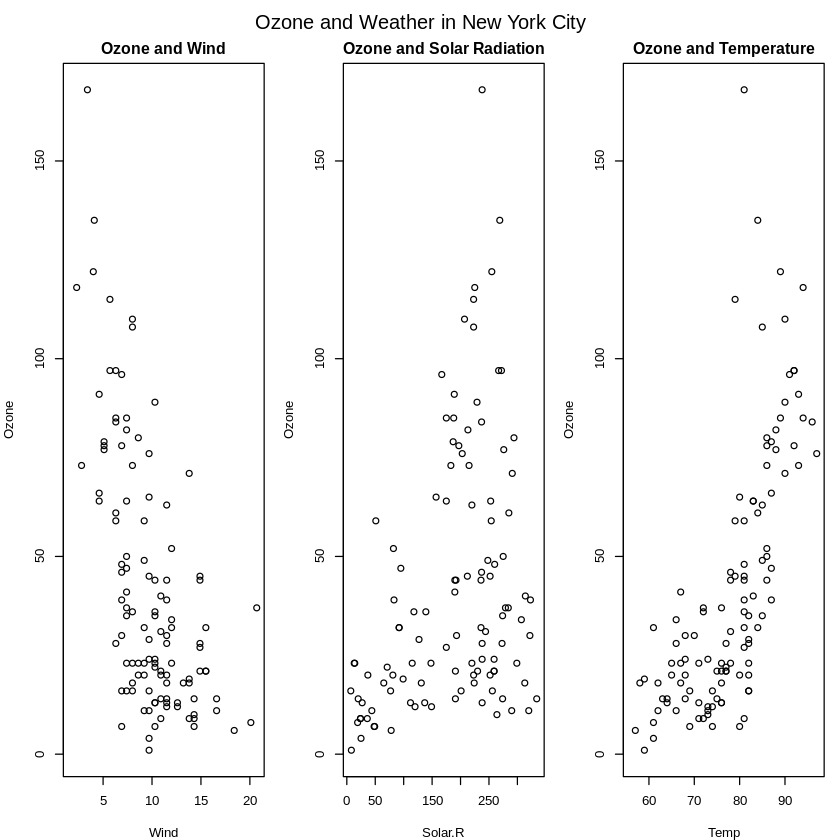

In [16]:
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1), oma = c(0, 0, 2, 0))
with(airquality, {
	plot(Wind, Ozone, main = "Ozone and Wind")
	plot(Solar.R, Ozone, main = "Ozone and Solar Radiation")
	plot(Temp, Ozone, main = "Ozone and Temperature")
	mtext("Ozone and Weather in New York City", outer = TRUE)
})

### Summary

* Plots in the base plotting system are created by calling successive
  R functions to "build up" a plot

* Plotting occurs in two stages:
  - Creation of a plot
  - Annotation of a plot (adding lines, points, text, legends)

* The base plotting system is very flexible and offers a high degree
  of control over plotting

## ggplot2

### What is ggplot2?

- An implementation of the __Grammar of Graphics__ by Leland Wilkinson
- Grammar of graphics represents and abstraction of graphics ideas/objects
- Think “verb”, “noun”, “adjective” for graphics
- Allows for a “theory” of graphics on which to build new graphics and graphics objects

### Basic Components of a ggplot2 Plot
- A _data frame_
- _aesthetic mappings_: how data are mapped to color, size 
- _geoms_: geometric objects like points, lines, shapes. 
- _facets_: for conditional plots. 
- _stats_: statistical transformations like binning, quantiles, smoothing. 
- _scales_: what scale an aesthetic map uses (example: male = red, female = blue). 
- _coordinate system_ 


### Building Plots with ggplot2
- When building plots in ggplot2 (rather than using qplot) the “artist’s palette” model may be the closest analogy
- Plots are built up in layers
  - Plot the data
  - Overlay a summary
  - Metadata and annotation

### Example: BMI, PM$_{2.5}$, Asthma
- Mouse Allergen and Asthma Cohort Study
- Baltimore children (age 5-17)
- Persistent asthma, exacerbation in past year
- Does BMI (normal vs. overweight) modify the relationship between PM$_{2.5}$ and asthma symptoms?


In [38]:
fileUrl <- "https://raw.githubusercontent.com/rdpeng/artofdatascience/master/manuscript/data/bmi_pm25_no2_sim.csv"
download.file(fileUrl, destfile = "bmi_pm25_no2_sim.csv", method = "curl")

In [4]:
maacs <- read.csv("bmi_pm25_no2_sim.csv")
head(maacs)

logpm25,logno2_new,bmicat,NocturnalSympt
1.2476997,1.1837987,normal weight,1
1.1216476,1.5515362,overweight,0
1.9300429,1.4323519,normal weight,0
1.3679246,1.7736804,overweight,2
0.7753367,0.7654826,normal weight,0
1.4872785,1.1127378,normal weight,0


### Basic Plot

Warning message:
“Ignoring unknown parameters: method”

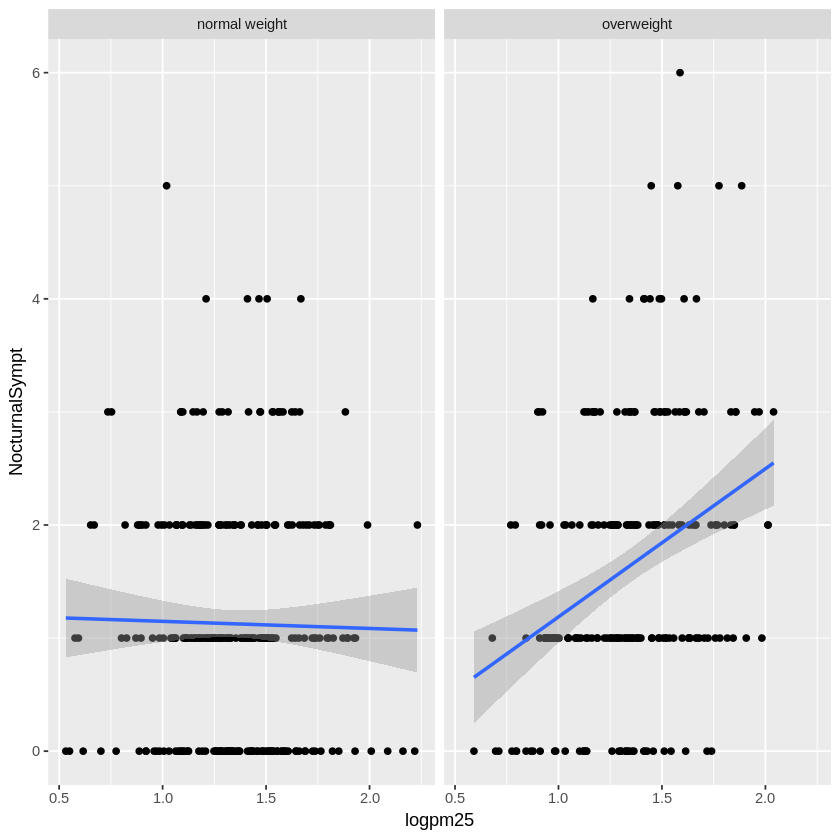

In [5]:
library(ggplot2)
qplot(logpm25, NocturnalSympt, data = maacs, facets = . ~ bmicat, 
      geom = c("point", "smooth"), method = "lm")

### Building Up in Layers

In [46]:
head(maacs)

logpm25,logno2_new,bmicat,NocturnalSympt
1.2476997,1.1837987,normal weight,1
1.1216476,1.5515362,overweight,0
1.9300429,1.4323519,normal weight,0
1.3679246,1.7736804,overweight,2
0.7753367,0.7654826,normal weight,0
1.4872785,1.1127378,normal weight,0


In [6]:
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
summary(g)

data: logpm25, logno2_new, bmicat, NocturnalSympt [517x4]
mapping:  x = ~logpm25, y = ~NocturnalSympt
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


### No Plot Yet!

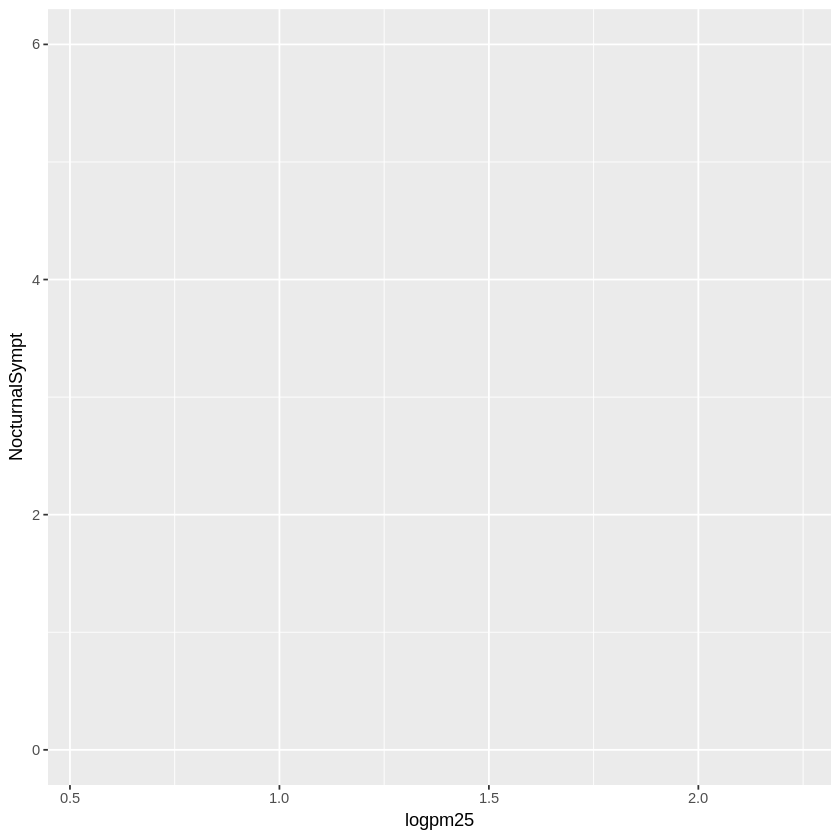

In [7]:
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
print(g)


### First Plot with Point Layer

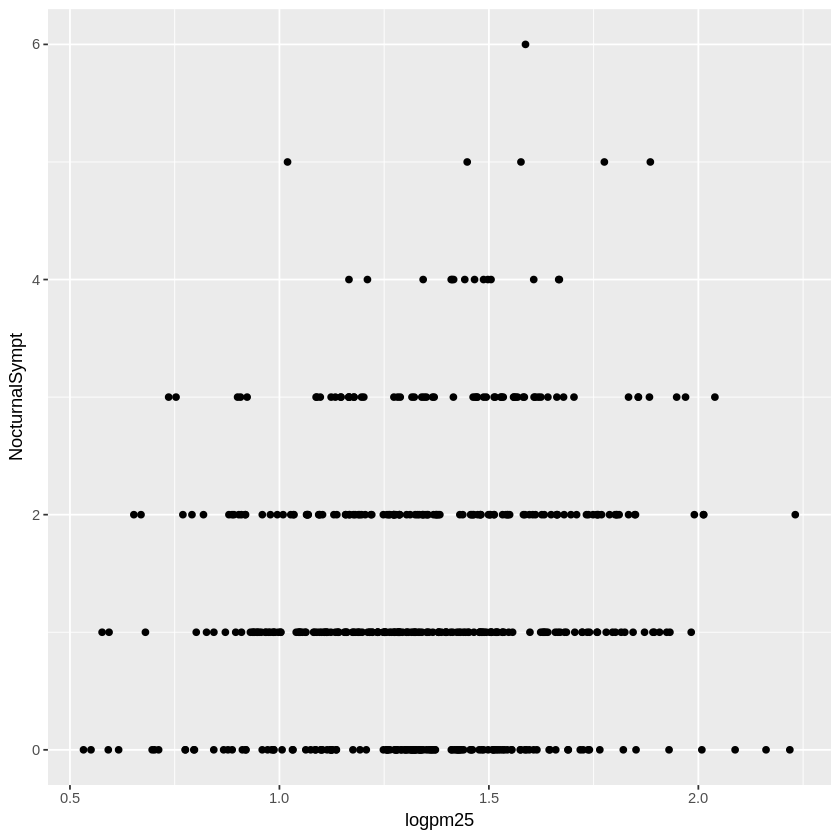

In [48]:
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
g + geom_point()

### Adding More Layers: Smooth

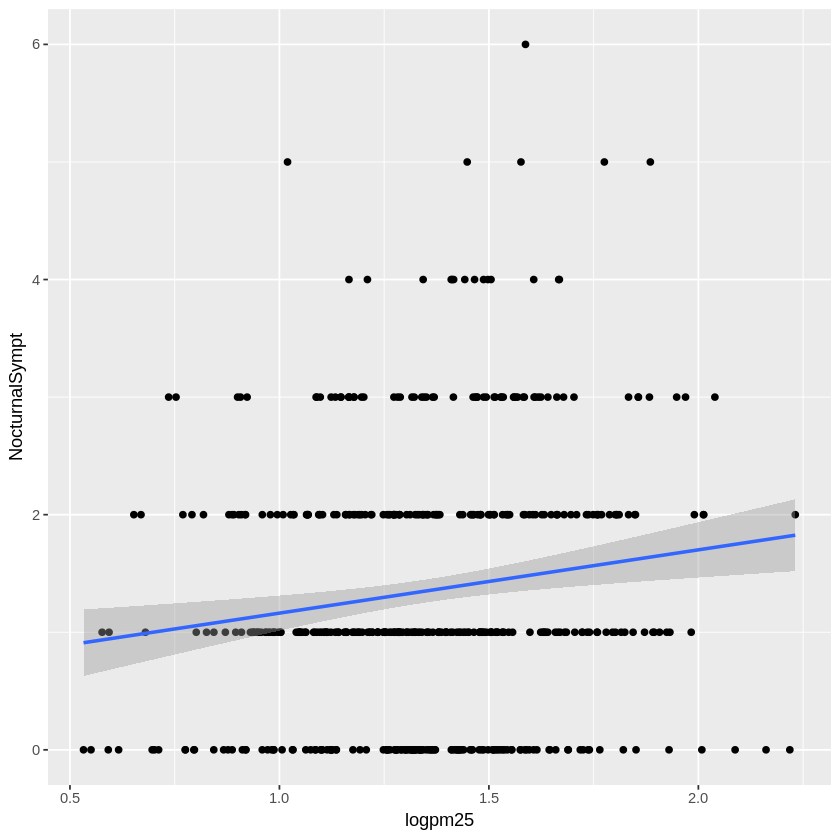

In [8]:
#g + geom_point() + geom_smooth()
g + geom_point() + geom_smooth(method = "lm")

### Adding More Layers: Facets

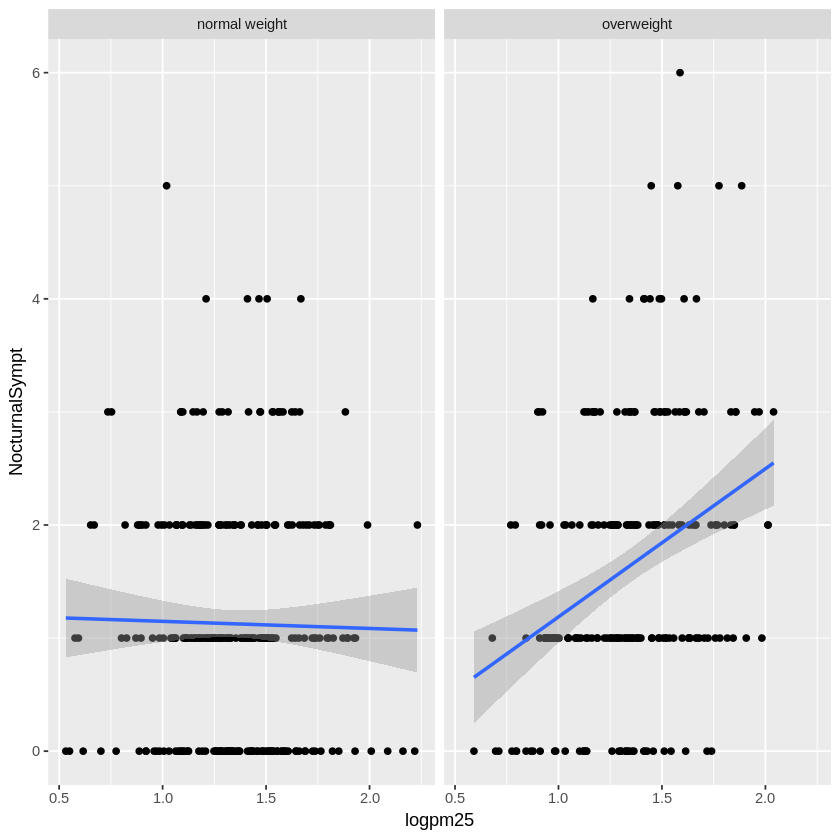

In [50]:
g + geom_point() + facet_grid(. ~ bmicat) + geom_smooth(method = "lm")

### Annotation
- Labels: `xlab()`, `ylab()`, `labs()`, `ggtitle()`
- Each of the “geom” functions has options to modify 
- For things that only make sense globally, use `theme()` 
  - Example: `theme(legend.position = "none")` 
- Two standard appearance themes are included
  - `theme_gray()`: The default theme (gray background)
  - `theme_bw()`: More stark/plain 

### Modifying Aesthetics

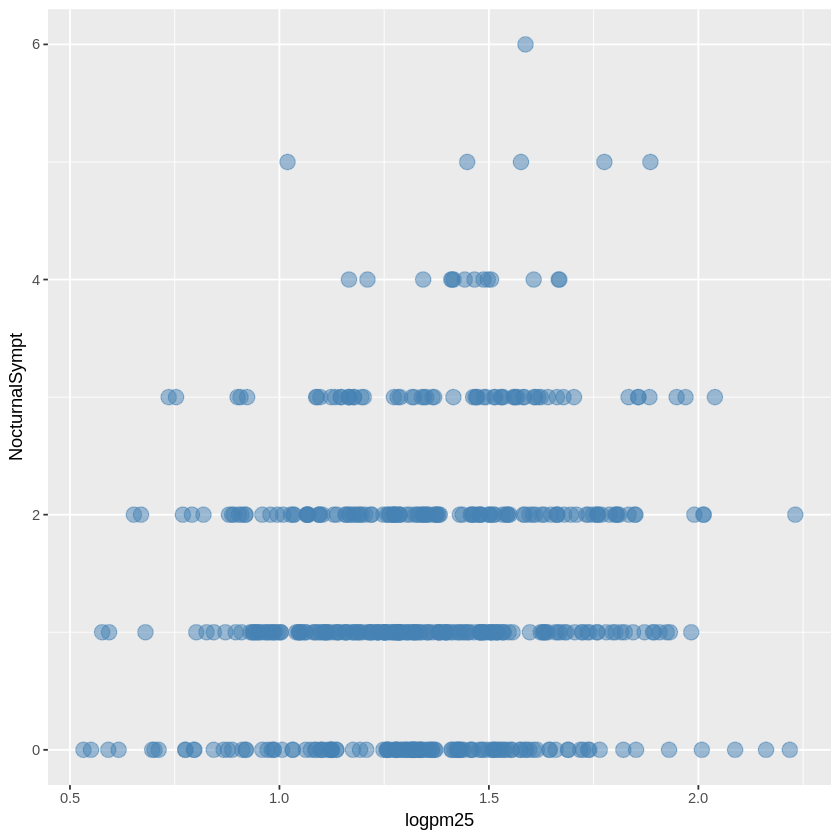

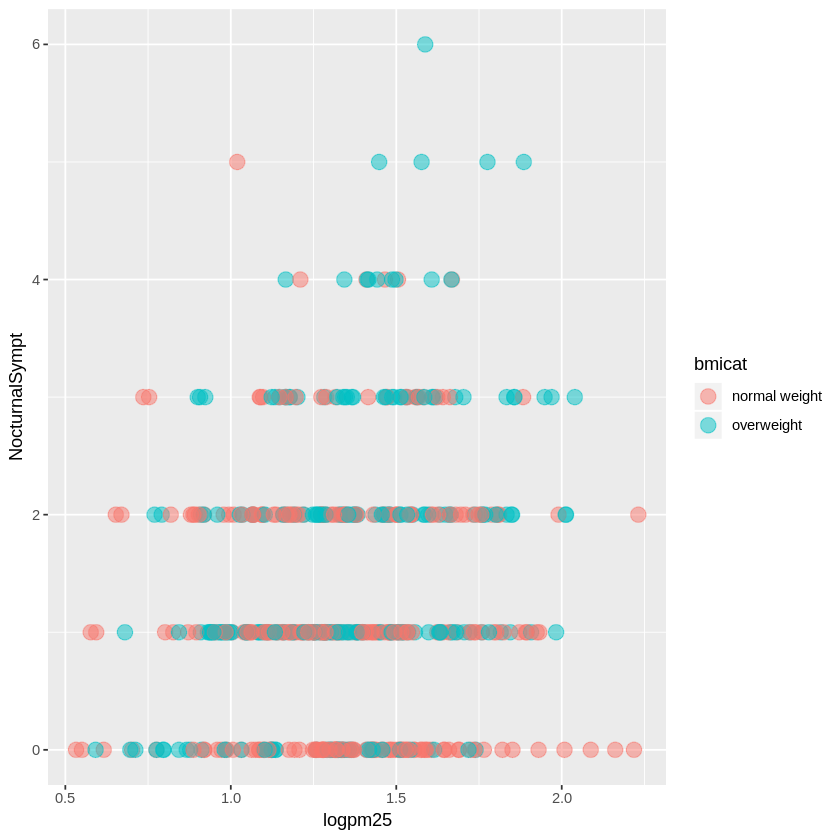

In [51]:
g + geom_point(color = "steelblue", size = 4, alpha = 1/2)
g + geom_point(aes(color = bmicat), size = 4, alpha = 1/2)


### Modifying Labels

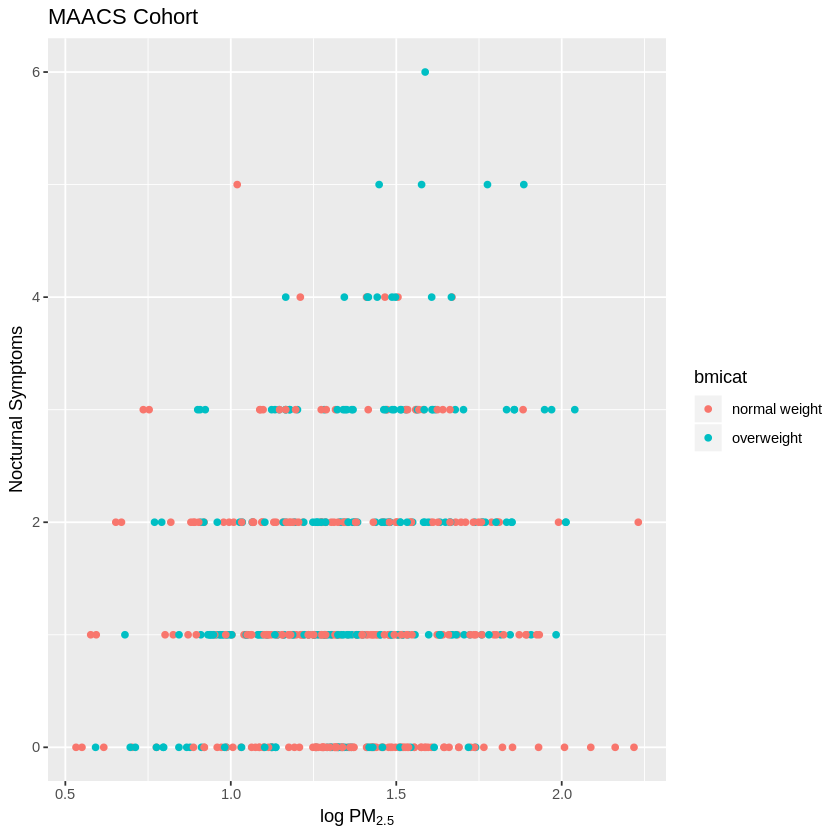

In [52]:
g + geom_point(aes(color = bmicat)) + labs(title = "MAACS Cohort") + 
  labs(x = expression("log " * PM[2.5]), y = "Nocturnal Symptoms")


### Customizing the Smooth

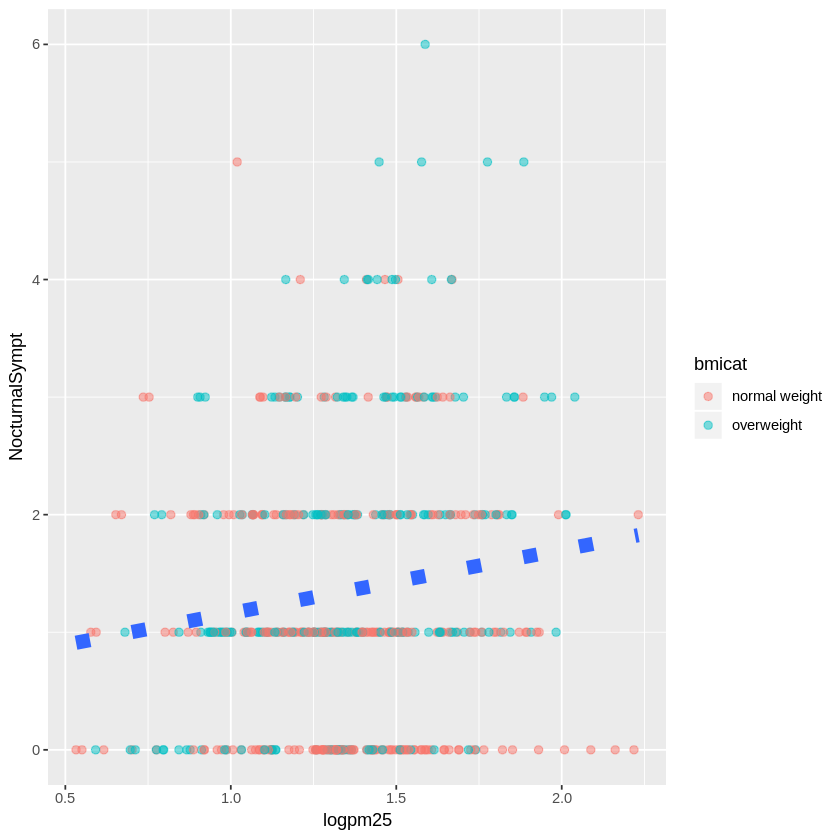

In [53]:
g + geom_point(aes(color = bmicat), size = 2, alpha = 1/2) + 
  geom_smooth(size = 4, linetype = 3, method = "lm", se = FALSE)


### Changing the Theme

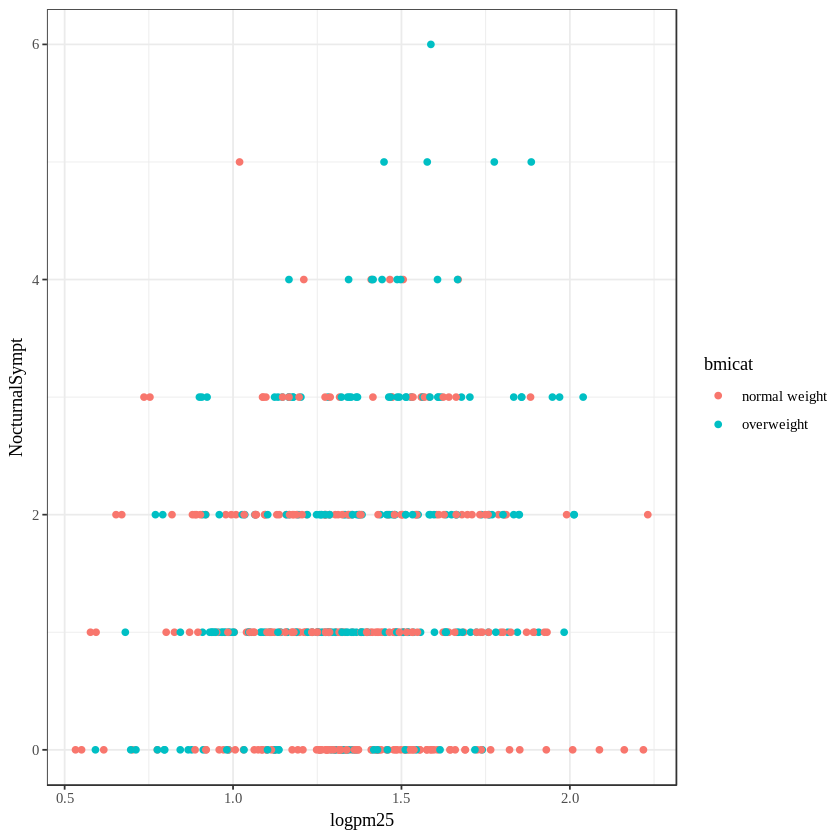

In [54]:
g + geom_point(aes(color = bmicat)) + theme_bw(base_family = "Times")

### A Note about Axis Limits

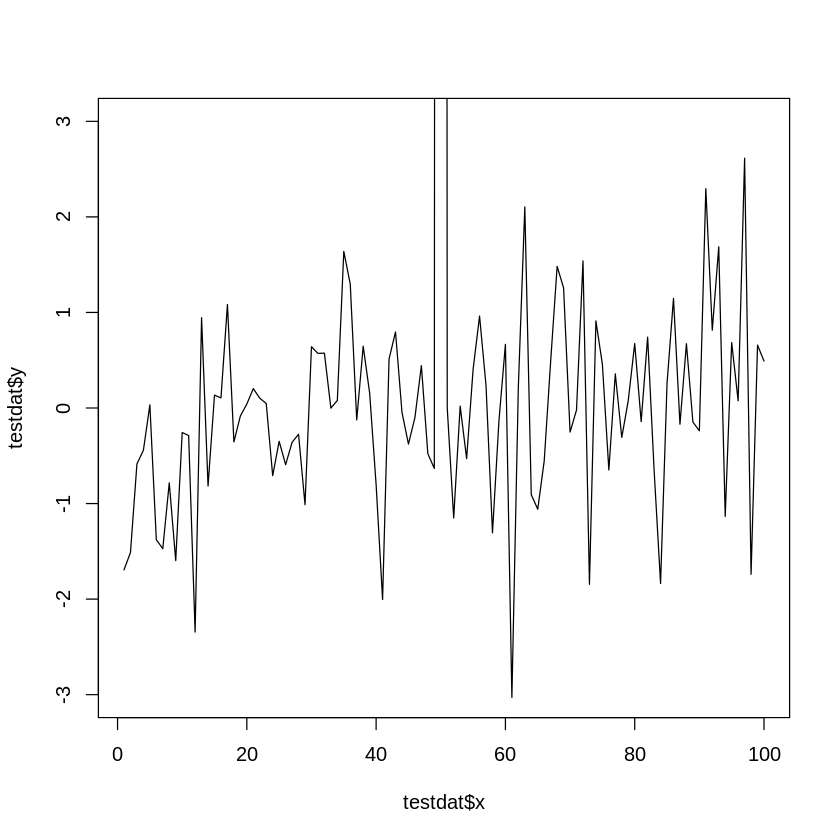

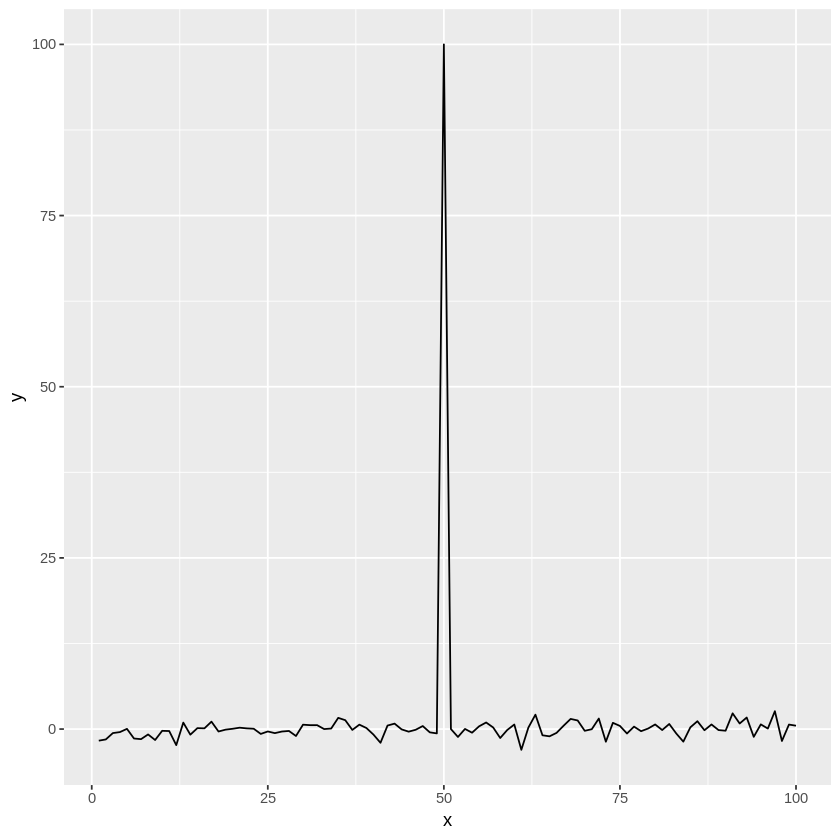

In [55]:
testdat <- data.frame(x = 1:100, y = rnorm(100))
testdat[50,2] <- 100  ## Outlier!
plot(testdat$x, testdat$y, type = "l", ylim = c(-3,3))
g <- ggplot(testdat, aes(x = x, y = y))
g + geom_line()

### Axis Limits

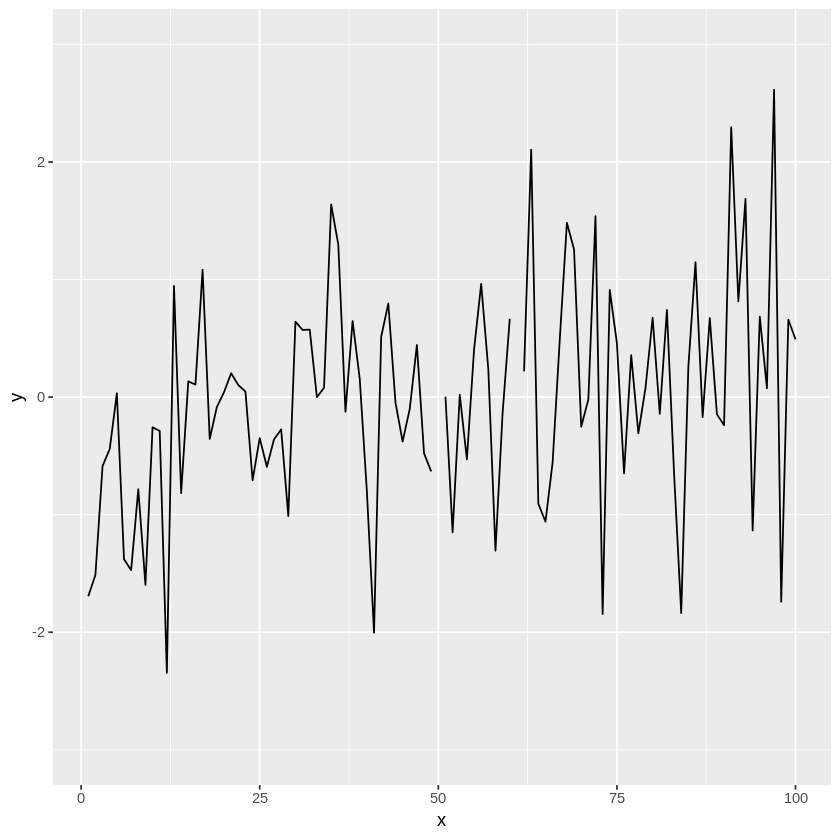

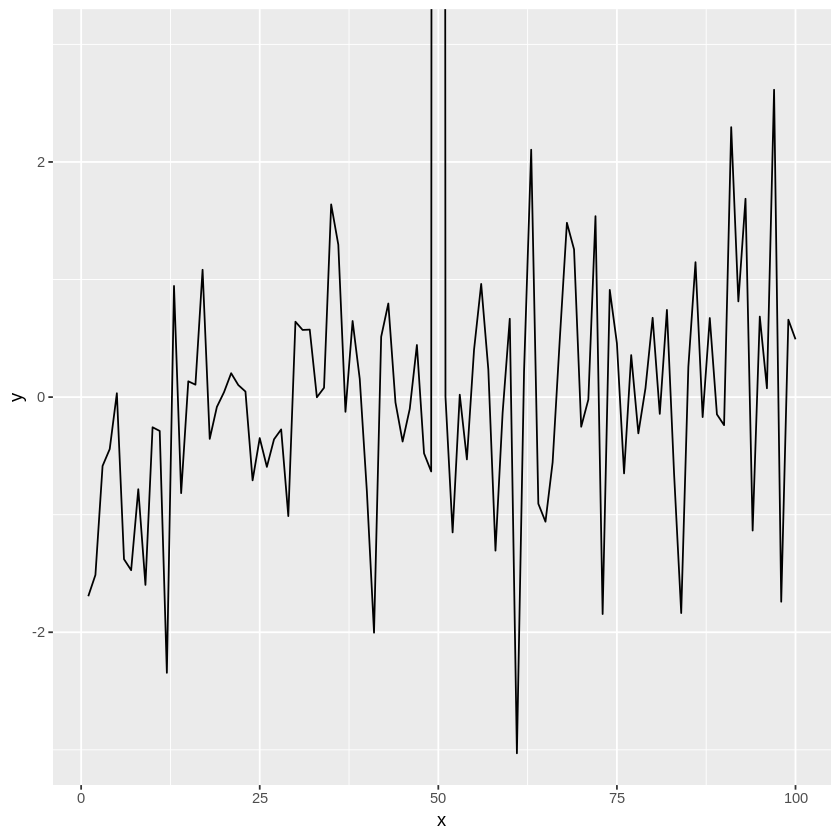

In [56]:
g + geom_line() + ylim(-3, 3)
g + geom_line() + coord_cartesian(ylim = c(-3, 3))


### More Complex Example
- How does the relationship between PM$_{2.5}$ and nocturnal symptoms vary by BMI and NO$_2$?
- Unlike our previous BMI variable, NO$_2$ is continuous
- We need to make NO$_2$ categorical so we can condition on it in the plotting
- Use the `cut()` function for this


### Making NO$_2$ Tertiles

In [57]:
## Calculate the tertiles of the data
cutpoints <- quantile(maacs$logno2_new, seq(0, 1, length = 4), na.rm = TRUE)
## Cut the data at the tertiles and create a new factor variable
maacs$no2tert <- cut(maacs$logno2_new, cutpoints)
## See the levels of the newly created factor variable
levels(maacs$no2tert)


[1] "(0.342,1.23]" "(1.23,1.47]"  "(1.47,2.17]"

### Final Plot

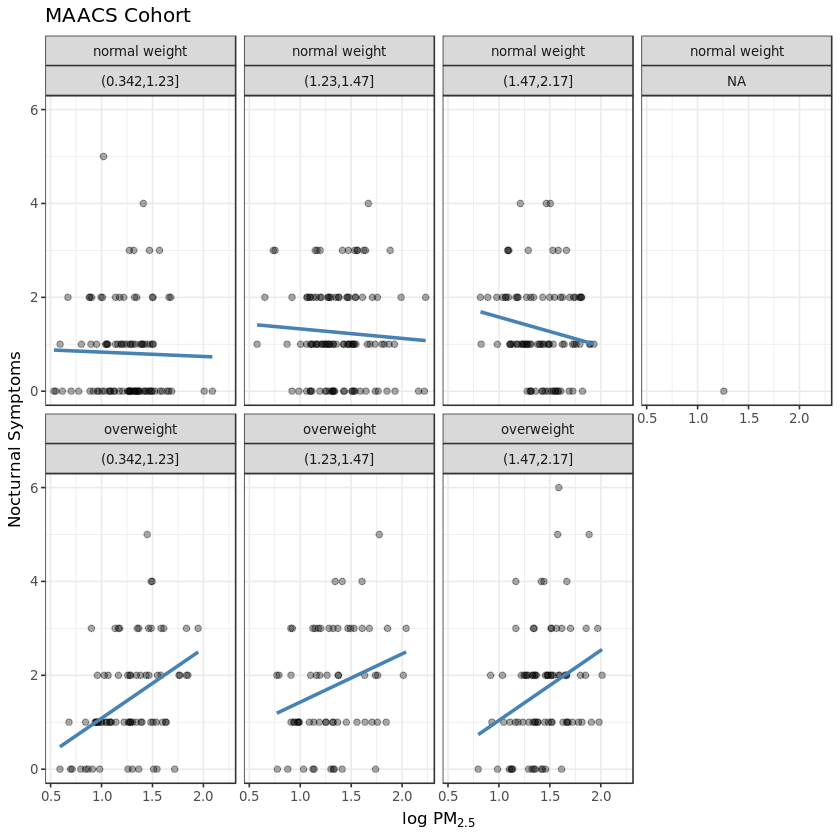

### Code for Final Plot
```r
## Setup ggplot with data frame
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
## Add layers
g + geom_point(alpha = 1/3) + 
  facet_wrap(bmicat ~ no2tert, nrow = 2, ncol = 4) + 
  geom_smooth(method="lm", se=FALSE, col="steelblue") + 
  theme_bw(base_family = "Avenir", base_size = 10) + 
  labs(x = expression("log " * PM[2.5])) + 
  labs(y = "Nocturnal Symptoms") + 
  labs(title = "MAACS Cohort")
```

## Linear regression

### Basic regression model with additive Gaussian errors.
* Least squares is an estimation tool, how do we do inference?
* Consider developing a probabilistic model for linear regression
$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_{i}
$$
* Here the $\epsilon_{i}$ are assumed iid $N(0, \sigma^2)$. 
* Note, $E[Y_i ~|~ X_i = x_i] = \mu_i = \beta_0 + \beta_1 x_i$
* Note, $Var(Y_i ~|~ X_i = x_i) = \sigma^2$.


### Recap
* Model $Y_i =  \mu_i + \epsilon_i = \beta_0 + \beta_1 X_i + \epsilon_i$ where $\epsilon_i$ are iid $N(0, \sigma^2)$
* ML estimates of $\beta_0$ and $\beta_1$ are the least squares estimates
  $$\hat \beta_1 = Cor(Y, X) \frac{Sd(Y)}{Sd(X)} ~~~ \hat \beta_0 = \bar Y - \hat \beta_1 \bar X$$
* $E[Y ~|~ X = x] = \beta_0 + \beta_1 x$
* $Var(Y ~|~ X = x) = \sigma^2$


### Interpretting regression coefficients, the itc
* $\beta_0$ is the expected value of the response when the predictor is 0
$$
E[Y | X = 0] =  \beta_0 + \beta_1 \times 0 = \beta_0
$$
* Note, this isn't always of interest, for example when $X=0$ is impossible or far outside of the range of data. (X is blood pressure, or height etc.) 
* Consider that 
$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
= \beta_0 + a \beta_1 + \beta_1 (X_i - a) + \epsilon_i
= \tilde \beta_0 + \beta_1 (X_i - a) + \epsilon_i
$$
So, shifting you $X$ values by value $a$ changes the intercept, but not the slope. 
* Often $a$ is set to $\bar X$ so that the intercept is interpretted as the expected response at the average $X$ value.


### Interpretting regression coefficients, the slope
* $\beta_1$ is the expected change in response for a 1 unit change in the predictor
$$
E[Y ~|~ X = x+1] - E[Y ~|~ X = x] =
\beta_0 + \beta_1 (x + 1) - (\beta_0 + \beta_1 x ) = \beta_1
$$
* Consider the impact of changing the units of $X$. 
$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
= \beta_0 + \frac{\beta_1}{a} (X_i a) + \epsilon_i
= \beta_0 + \tilde \beta_1 (X_i a) + \epsilon_i
$$
* Therefore, multiplication of $X$ by a factor $a$ results in dividing the coefficient by a factor of $a$. 
* Example: $X$ is height in $m$ and $Y$ is weight in $kg$. Then $\beta_1$ is $kg/m$. Converting $X$ to $cm$ implies multiplying $X$ by $100 cm/m$. To get $\beta_1$ in the right units, we have to divide by $100 cm /m$ to get it to have the right units. 
$$
X m \times \frac{100cm}{m} = (100 X) cm
~~\mbox{and}~~
\beta_1 \frac{kg}{m} \times\frac{1 m}{100cm} = 
\left(\frac{\beta_1}{100}\right)\frac{kg}{cm}
$$


### Using regression coeficients for prediction
* If we would like to guess the outcome at a particular
  value of the predictor, say $X$, the regression model guesses
  $$
  \hat \beta_0 + \hat \beta_1 X
  $$
* Note that at the observed value of $X$s, we obtain the
  predictions
  $$
  \hat \mu_i = \hat Y_i = \hat \beta_0 + \hat \beta_1 X_i
  $$
* Remember that least squares minimizes 
$$
\sum_{i=1}^n (Y_i - \mu_i)
$$
for $\mu_i$ expressed as points on a line

### Example

### `diamond` data set from `UsingR` 
Data is diamond prices (Signapore dollars) and diamond weight
in carats (standard measure of diamond mass, 0.2 $g$). To get the data use `library(UsingR); data(diamond)`

Plotting the fitted regression line and data

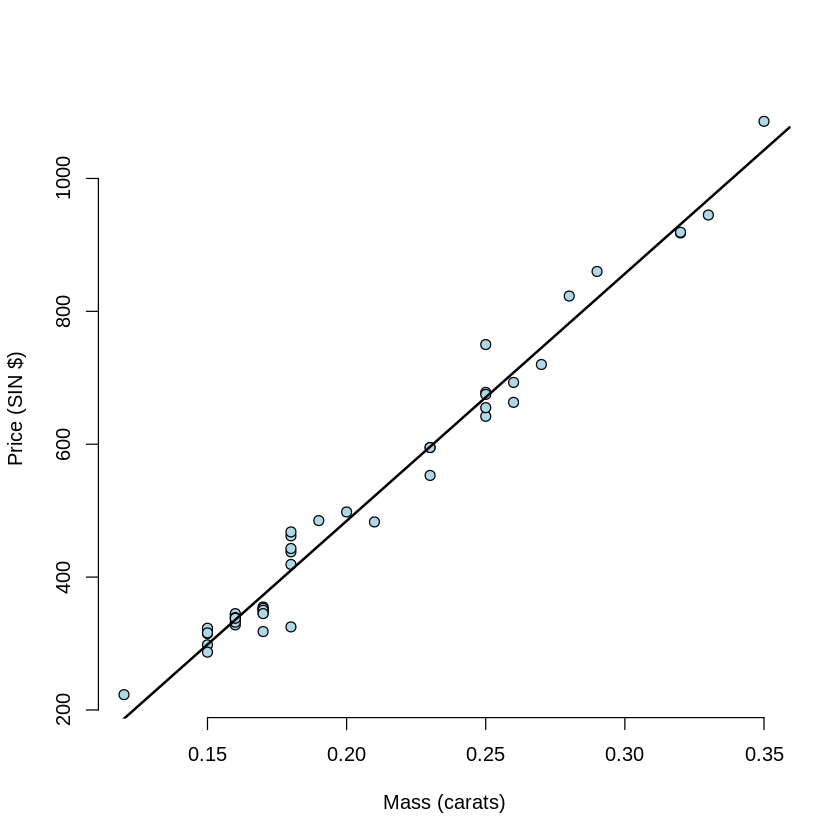

In [62]:
#install.packages("UsingR")
library(UsingR)
data(diamond)
plot(diamond$carat, diamond$price,  
     xlab = "Mass (carats)", 
     ylab = "Price (SIN $)", 
     bg = "lightblue", 
     col = "black", cex = 1.1, pch = 21,frame = FALSE)
abline(lm(price ~ carat, data = diamond), lwd = 2)

### The plot

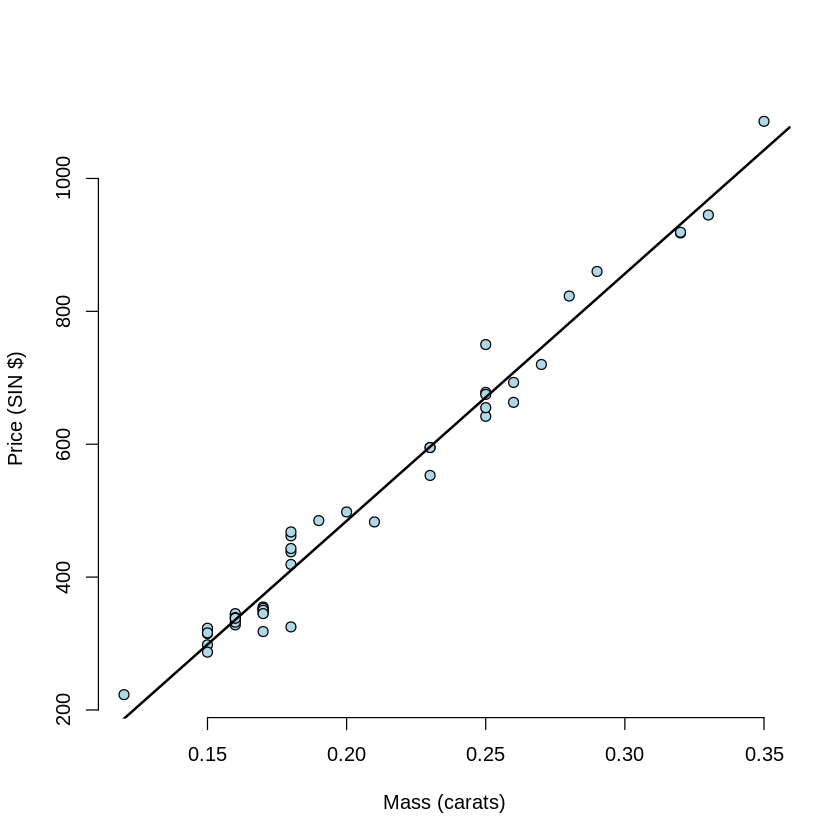

In [61]:
data(diamond)
plot(diamond$carat, diamond$price,  
     xlab = "Mass (carats)", 
     ylab = "Price (SIN $)", 
     bg = "lightblue", 
     col = "black", cex = 1.1, pch = 21,frame = FALSE)
abline(lm(price ~ carat, data = diamond), lwd = 2)


### Fitting the linear regression model

* We estimate an expected `r round(coef(fit)[2], 2)` (SIN) dollar increase in price for every carat increase in mass of diamond.
* The intercept `r round(coef(fit)[1], 2)` is the expected price
  of a 0 carat diamond.


In [63]:
fit <- lm(price ~ carat, data = diamond)
coef(fit)

(Intercept)       carat 
  -259.6259   3721.0249

### Getting a more interpretable intercept


In [67]:
fit2 <- lm(price ~ I(carat - mean(carat)), data = diamond)
coef(fit2)

(Intercept) I(carat - mean(carat)) 
              500.0833              3721.0249

Thus $`r round(coef(fit2)[1], 1)` is the expected price for 
the average sized diamond of the data (`r mean(diamond$carat)` carats).

### Changing scale
* A one carat increase in a diamond is pretty big, what about
  changing units to 1/10th of a carat? 
* We can just do this by just dividing the coeficient by 10.
  * We expect  a `r round(coef(fit)[2], 2) / 10` (SIN) dollar   change in price for every 1/10th of a carat increase in mass of diamond.
* Showing that it's the same if we rescale the Xs and refit

In [68]:
fit3 <- lm(price ~ I(carat * 10), data = diamond)
coef(fit3)


(Intercept) I(carat * 10) 
    -259.6259      372.1025

### Predicting the price of a diamond

In [69]:
newx <- c(0.16, 0.27, 0.34)
coef(fit)[1] + coef(fit)[2] * newx
predict(fit, newdata = data.frame(carat = newx))

[1]  335.7381  745.0508 1005.5225

1         2         3 
 335.7381  745.0508 1005.5225

Predicted values at the observed Xs (red)
and at the new Xs (lines)

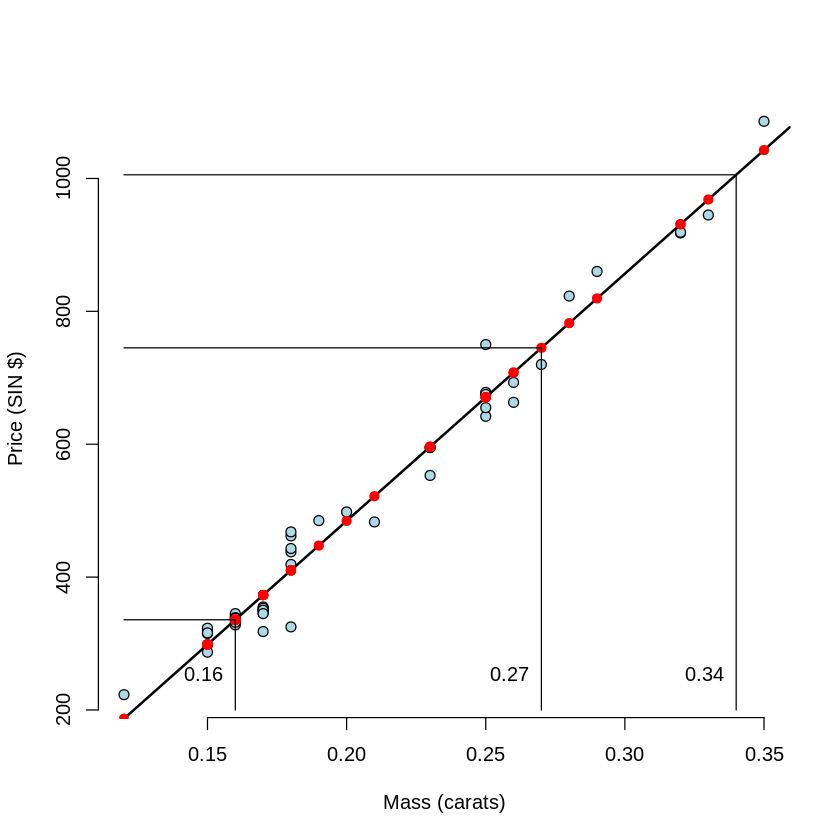

In [70]:
data(diamond)
plot(diamond$carat, diamond$price,  
     xlab = "Mass (carats)", 
     ylab = "Price (SIN $)", 
     bg = "lightblue", 
     col = "black", cex = 1.1, pch = 21,frame = FALSE)
abline(fit, lwd = 2)
points(diamond$carat, predict(fit), pch = 19, col = "red")
lines(c(0.16, 0.16, 0.12), 
      c(200, coef(fit)[1] + coef(fit)[2] * 0.16,
      coef(fit)[1] + coef(fit)[2] * 0.16))
lines(c(0.27, 0.27, 0.12), 
      c(200, coef(fit)[1] + coef(fit)[2] * 0.27,
        coef(fit)[1] + coef(fit)[2] * 0.27))
lines(c(0.34, 0.34, 0.12), 
      c(200, coef(fit)[1] + coef(fit)[2] * 0.34,
        coef(fit)[1] + coef(fit)[2] * 0.34))
text(newx, rep(250, 3), labels = newx, pos = 2)

## Questions